 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [200]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path

# importing matplotlib as an inline library
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

In [201]:
# Util functions
# This section contains some utility functions that could be used during the following sections

def load_csv(file_name):
    # load_csv function load the file via panda and returns the data frame
    # Plus this function always use Data as the index and parse date automatically
    # Furthermore, it sort all data by using the index
    df = pd.read_csv(file_name, index_col="Date",
                           infer_datetime_format=True, parse_dates=True)
    # sort the items by index
    df.sort_index()
    # return the df
    return df

def plot_beta_chart(df1, df2, window):
    # plot_beta_chard plots a beta diagram based on the given data frames and the window as parameters
    # df1 - the first data frame
    # df2 - the second data frame
    # window - the window for the rolling data
    custom_cov = df1.rolling(window=window).cov(df2)
    custom_var = df2.rolling(window=window).var()
    custom_beta = custom_cov / custom_var 
    custom_beta.plot(figsize=(20, 10))

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [202]:
# Reading whale returns
# Loading the whale returns from the csv file
# While loading it, use Date as the index and format the date and time appropriately in the DataFrame  
whale_df = load_csv("./Resources/whale_returns.csv")
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [203]:
# Count nulls
# isna returns all null records and sum function return the total 
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [204]:
# Drop nulls
# dropna remove all empty or null values 
whale_df.dropna(inplace=True)
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [205]:
# dtypes array contain all data types of the data frame
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [206]:
# Reading algorithmic returns
# Loading the algorithmic retunrs and use Date as the index
algo_df = load_csv("./Resources/algo_returns.csv")
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [207]:
# Count nulls
# isnull return all null values and sum returns the total 
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [208]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [209]:
# dtyps contain all data types of the data frame
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [210]:
# Reading S&P TSX 60 Closing Prices
# Loading the S&P data from the csv file and use the Date as the index
sp_df = load_csv("./Resources/sp_tsx_history.csv")
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [211]:
# Check Data Types
sp_df.dtypes
# Removing all special characters for the calculations
sp_df["Close"] = sp_df["Close"].str.replace('[^\w.]|_', '', regex=True)

sp_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [212]:
# Fix Data Types
sp_df["Close"] = sp_df["Close"].astype(float)

sp_df.dtypes


Close    float64
dtype: object

In [213]:
# Calculate Daily Returns
# pct_change function calculates the daily returns 
sp_daily_returns = sp_df.pct_change()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [214]:
# Drop nulls
# removing all null values and 
# inplace=True means change the base dataframe itself without returning a new value 
sp_df.dropna(inplace=True)
sp_df.isna().sum()

Close    0
dtype: int64

In [215]:
# Rename `Close` Column to be specific to this portfolio.
# renaming the colums. In this case, we are going to change only one colum name 
sp_daily_returns.rename(columns={"Close":"S&P Close"}, inplace=True)
sp_daily_returns.head()

,S&P Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [216]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#Since the S&P csv contains the closing price, it is required to convert the values into daily retunrs 
# Therefore while combining the charts sp_df.pct_change() is used
con_df = pd.concat([whale_df, algo_df, sp_daily_returns], axis="columns", join="inner")
con_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

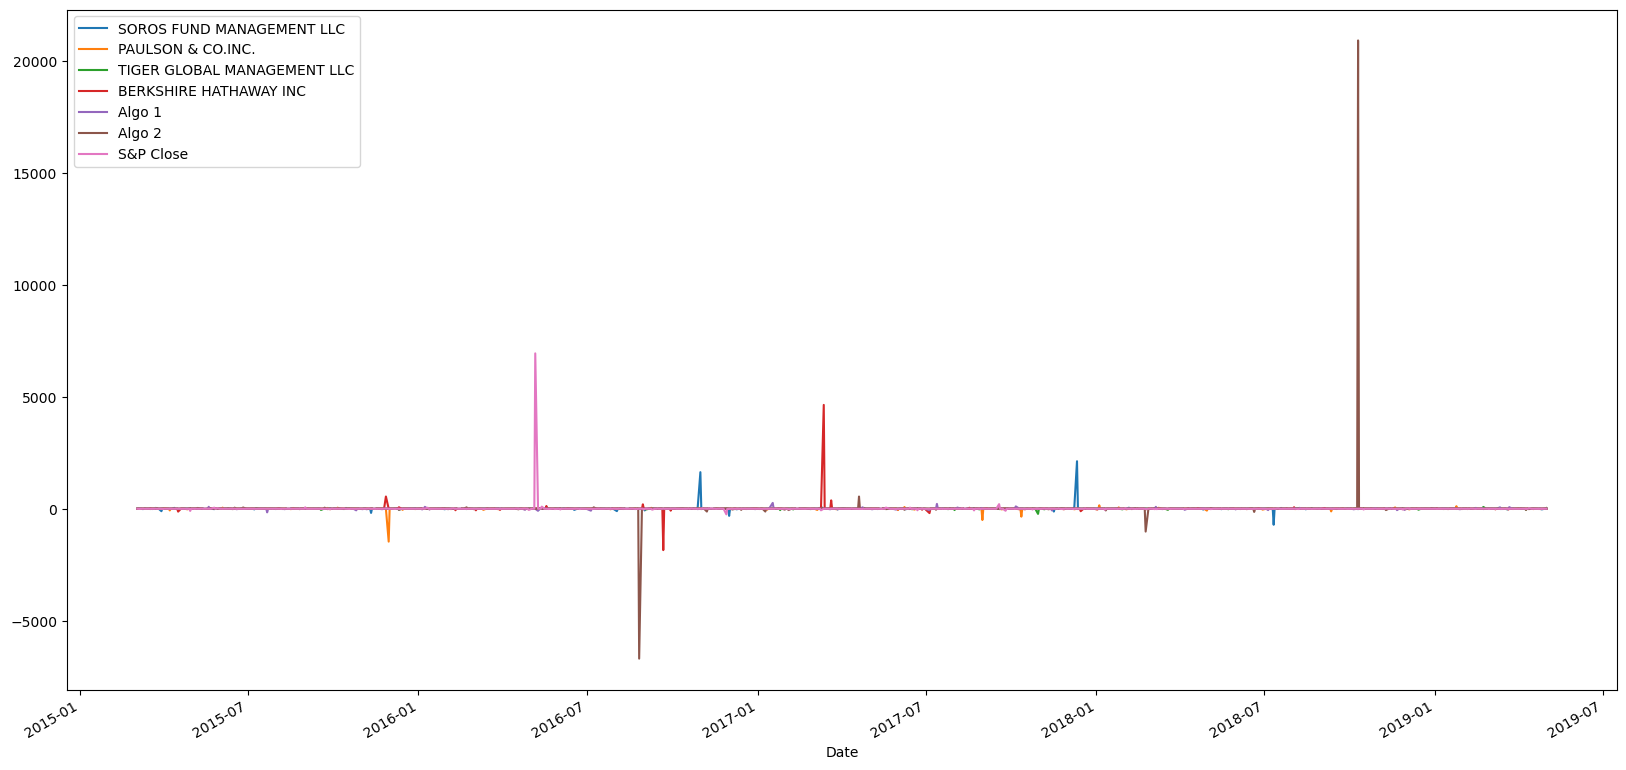

In [217]:
# Plot daily returns of all portfolios
con_daily_returns_df = con_df.pct_change()
con_daily_returns_df.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

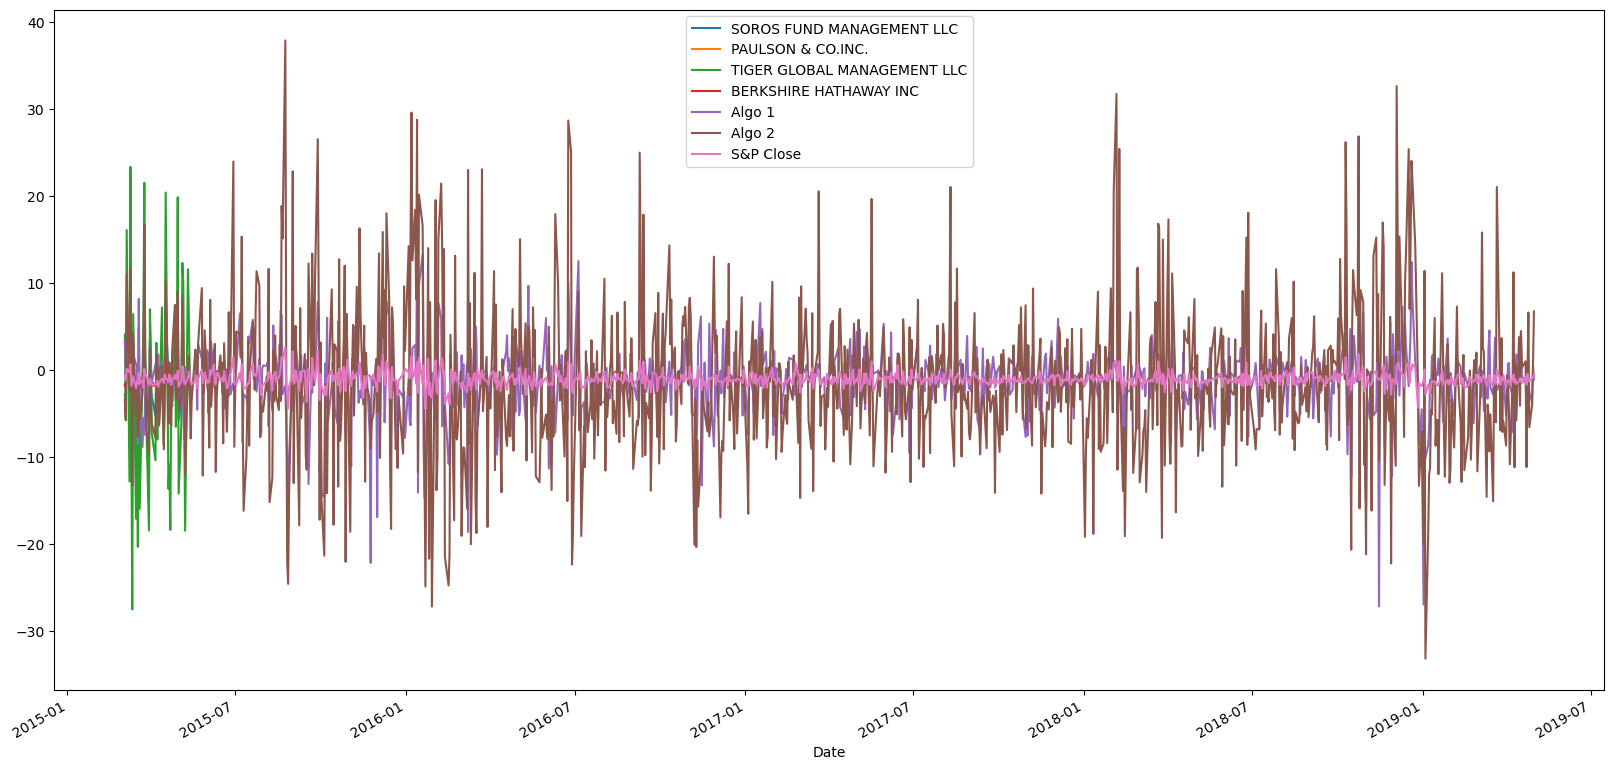

In [218]:
# Calculate cumulative returns of all portfolios
cumulative_con_daily_returns_df = (1 + con_daily_returns_df).cumprod() -1

# Plot cumulative returns
cumulative_con_daily_returns_df.plot(figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

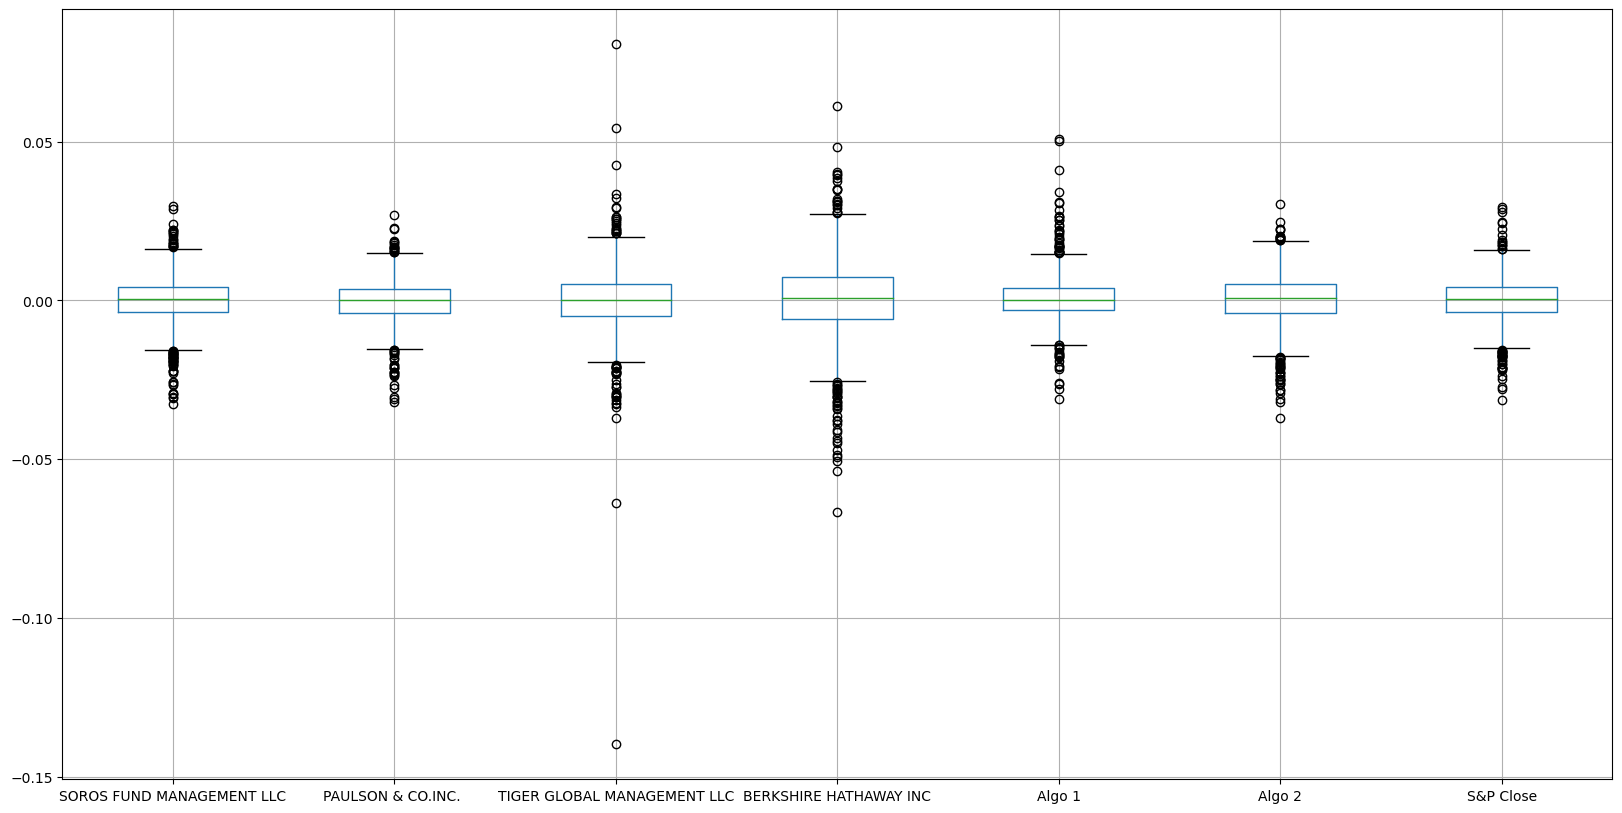

In [219]:
# Box plot to visually show risk
# box plot for combined plots
con_df.boxplot(figsize=(20, 10))

<AxesSubplot:>

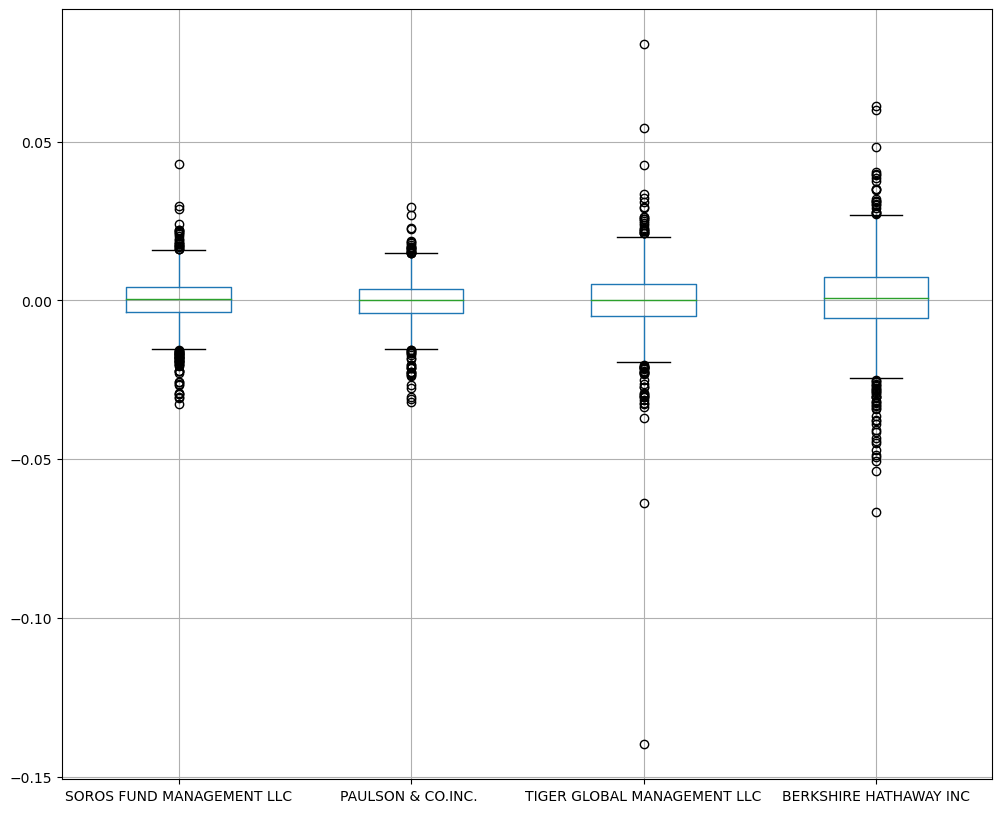

In [220]:
# Box plot for whale df
# boxplot function plots a box plot diagram
whale_df.boxplot(figsize=(12, 10))

<AxesSubplot:>

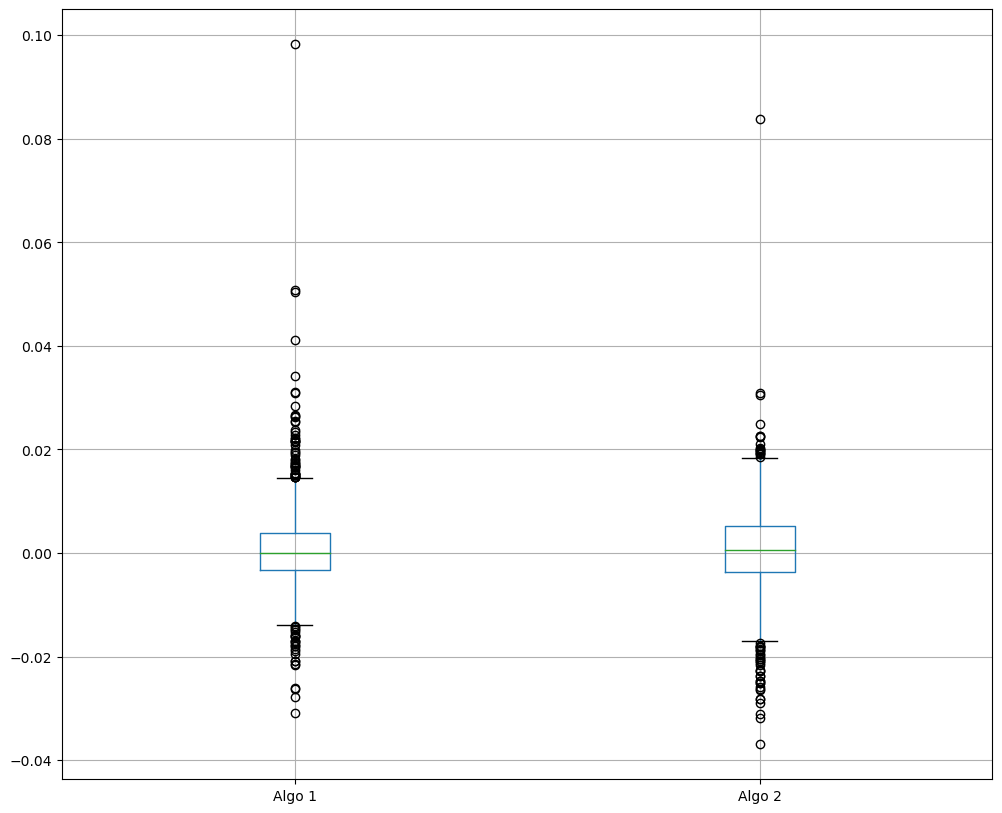

In [221]:
# Box plot for algorithmic trading
algo_df.boxplot(figsize=(12, 10))

<AxesSubplot:>

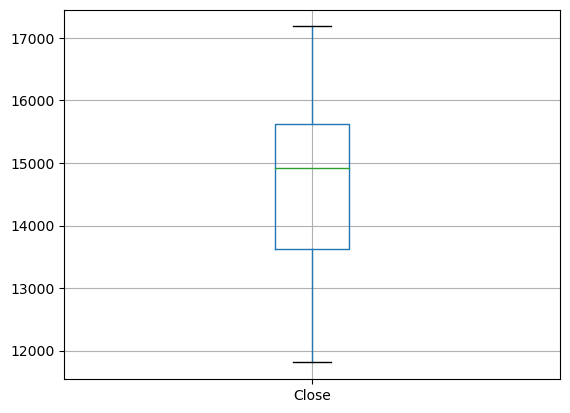

In [222]:
# Box plot for S&P returns
sp_df.boxplot()

### Calculate Standard Deviations

In [223]:
# Calculate the daily standard deviations of all portfolios
# ddof =0 to indicated 0 instead of NA
con_df.dropna(inplace=True)
con_std = con_df.std(ddof=0)

con_std

SOROS FUND MANAGEMENT LLC      0.007824
PAULSON & CO.INC.              0.006979
TIGER GLOBAL MANAGEMENT LLC    0.010877
BERKSHIRE HATHAWAY INC         0.012819
Algo 1                         0.007585
Algo 2                         0.008322
S&P Close                      0.007031
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [224]:
# Calculate  the daily standard deviation of S&P TSX 60
# Get the standard deviation of the daily returns 
# Since we already have calvulated all standard deviations for the combined data frame, we can simply get the S&P standard deviation by accessing the con_std variable
sp_std_val = con_std["S&P Close"]
print(f"standard deviation of the S&P is {sp_std_val}\n")


# Determine which portfolios are riskier than the S&P TSX 60
for col_name in con_df:
    if con_std[col_name] > sp_std_val:
        print(f"{col_name} is risker than S&P")

standard deviation of the S&P is 0.007030748954816322

SOROS FUND MANAGEMENT LLC is risker than S&P
TIGER GLOBAL MANAGEMENT LLC is risker than S&P
BERKSHIRE HATHAWAY INC is risker than S&P
Algo 1 is risker than S&P
Algo 2 is risker than S&P


### Calculate the Annualized Standard Deviation

In [225]:
# Calculate the annualized standard deviation (252 trading days)
anual_std = con_std*np.sqrt(252)
anual_std

SOROS FUND MANAGEMENT LLC      0.124199
PAULSON & CO.INC.              0.110787
TIGER GLOBAL MANAGEMENT LLC    0.172675
BERKSHIRE HATHAWAY INC         0.203500
Algo 1                         0.120411
Algo 2                         0.132113
S&P Close                      0.111610
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

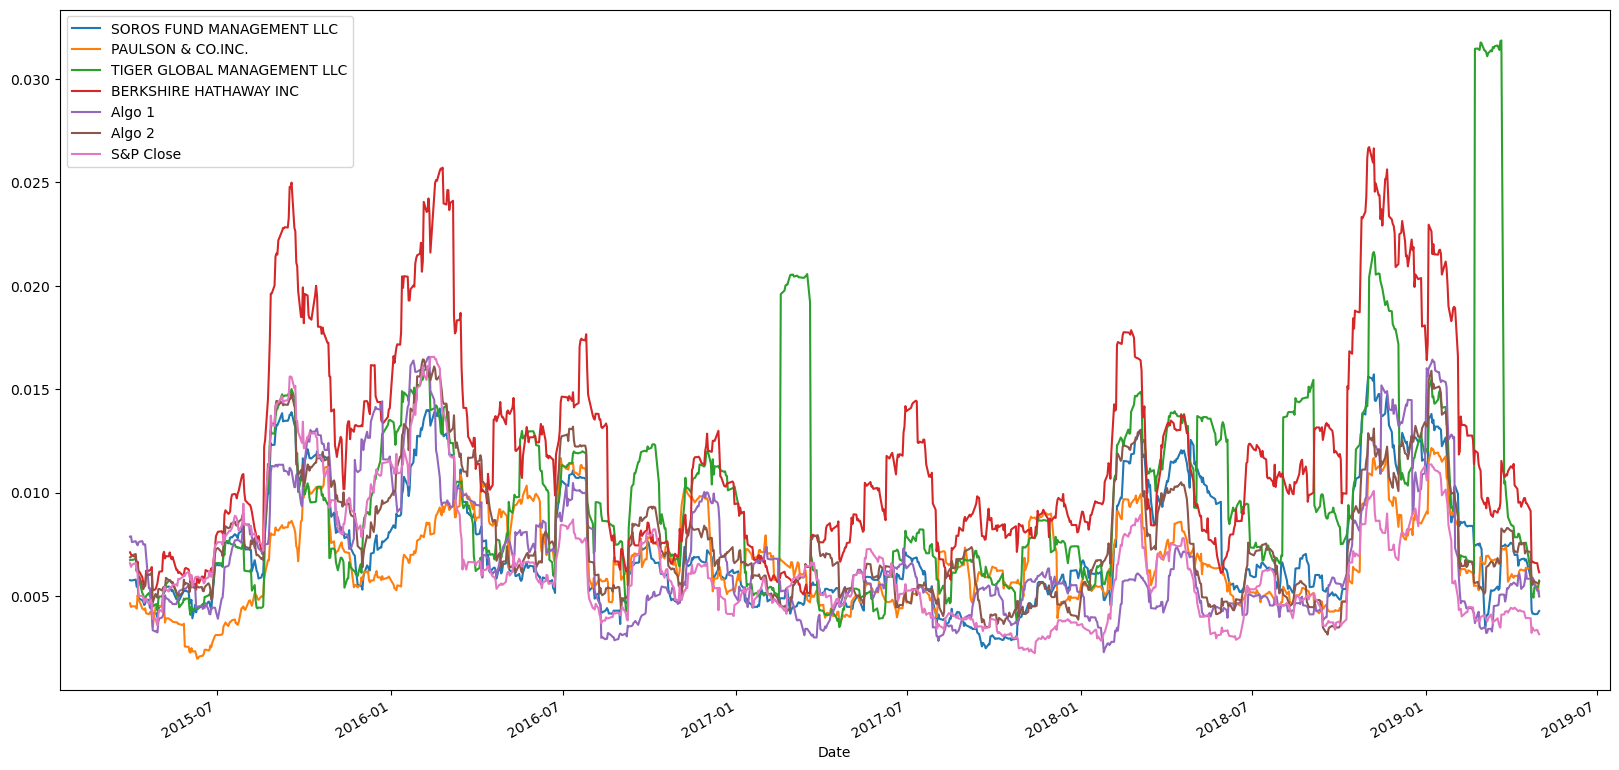

In [226]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = con_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

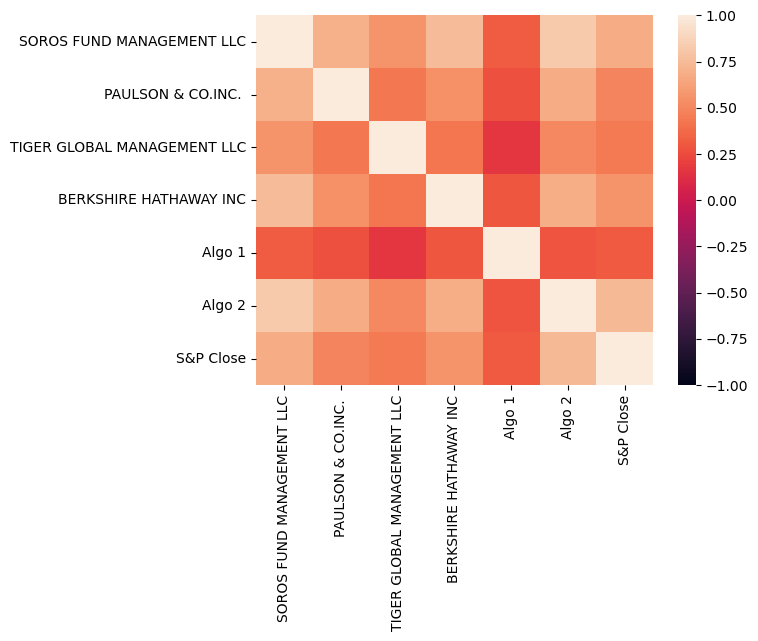

In [227]:
# Calculate the correlation
# corr function of the Dataframe returns the correlations 
cor = con_df.corr()

# Display de correlation matrix
sns.heatmap(cor, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

The covariance of algo 1 is 1.6563000308911375e-05
beta = 0.3347445908185684


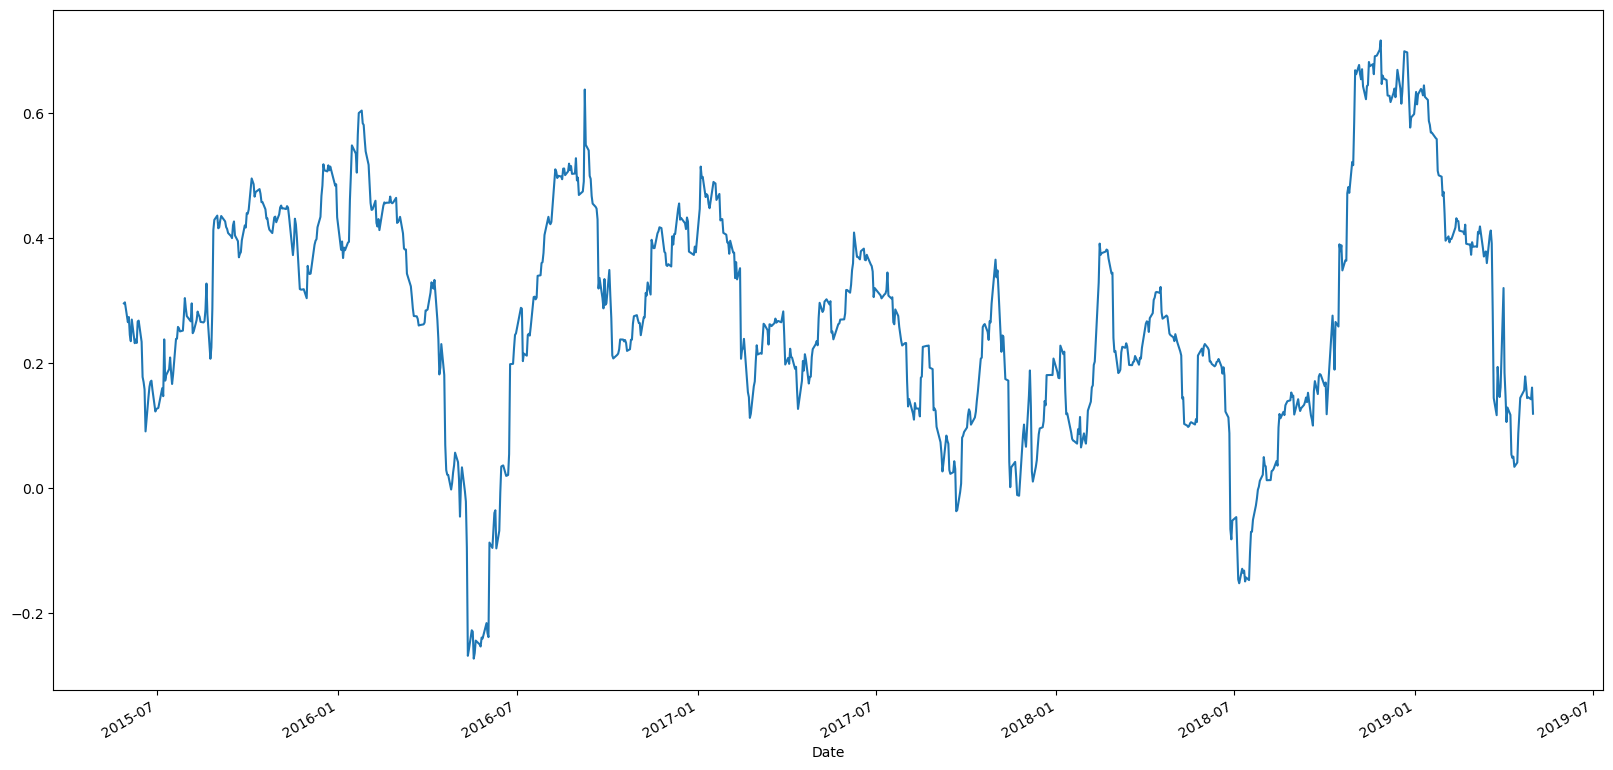

In [228]:
# Calculate covariance of a single portfolio
# It is required to use the S&P and the selected portfolio to calculate the covariance
covar_algo = con_df["Algo 1"].cov(con_df["S&P Close"])
print(f"The covariance of algo 1 is {covar_algo}")

# Calculate variance of S&P TSX
# var function of the dataframe returns the variance 
sp_var = con_df["S&P Close"].var()

# Computing beta
sp_beta = covar_algo / sp_var
print(f"beta = {sp_beta}")

# Plot beta trend
# In order to create a plot, it is required to get an array of data. 
# Since, var and cov functions by default returns an float, rolling function could be used to get a list of records as an alternative approach
plot_beta_chart(con_df["Algo 1"], con_df["S&P Close"], 60)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

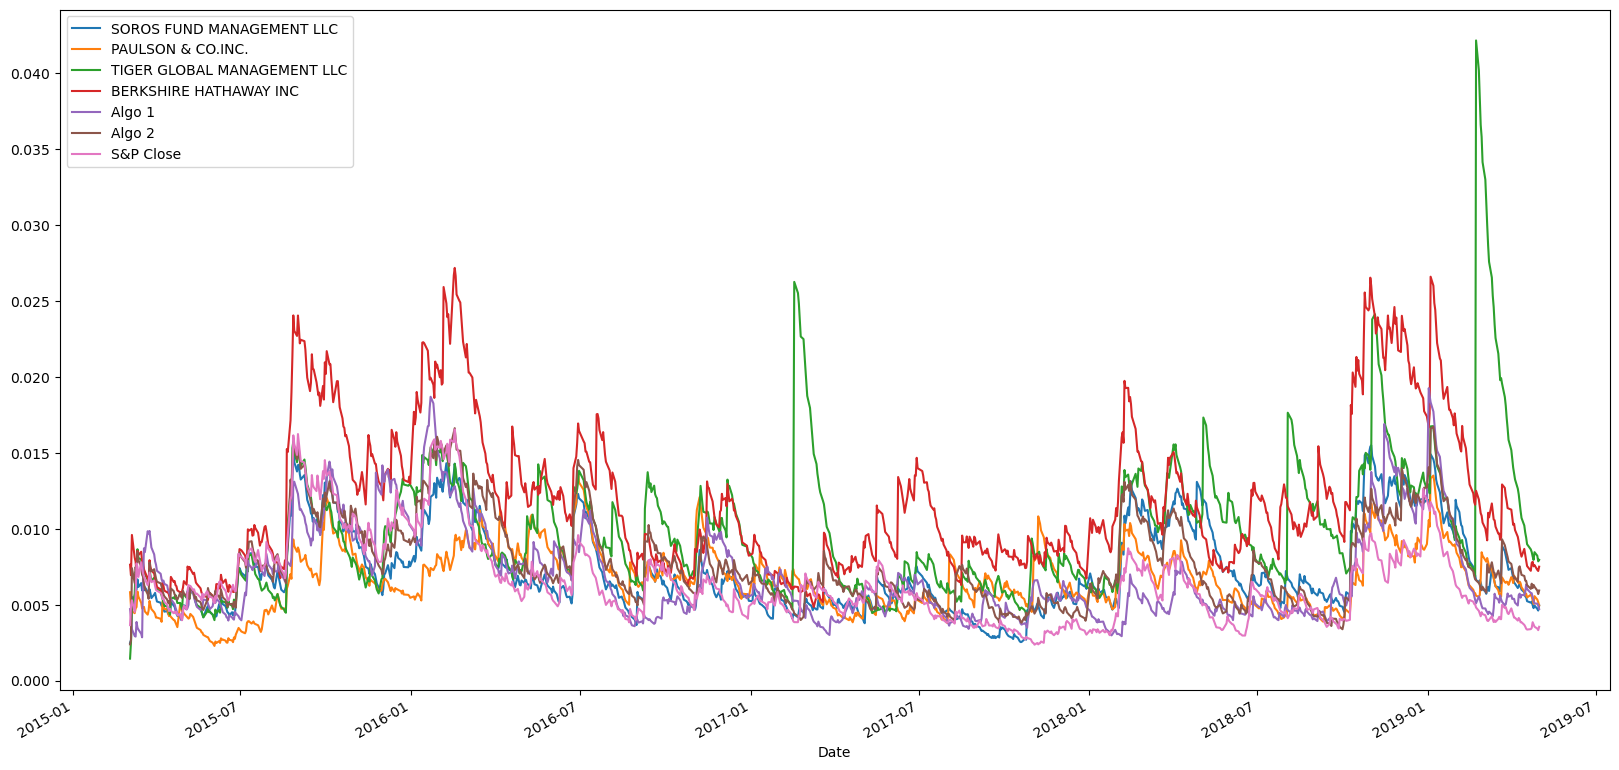

In [229]:
# Use `ewm` to calculate the rolling window
con_ewn = con_df.ewm(span=21).std()

# Ploting the ewn of the combinated dataframe
con_ewn.plot(figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [230]:
# Annualized Sharpe Ratios
# mean function of the Dataframe returns the mean and std returns the standard deviation 
# 252 is the annual number of days
sharpe_ratio = (con_df.mean() * 252) / (con_df.std()* np.sqrt(252))
sharpe_ratio.head()

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio of the Returns'}>

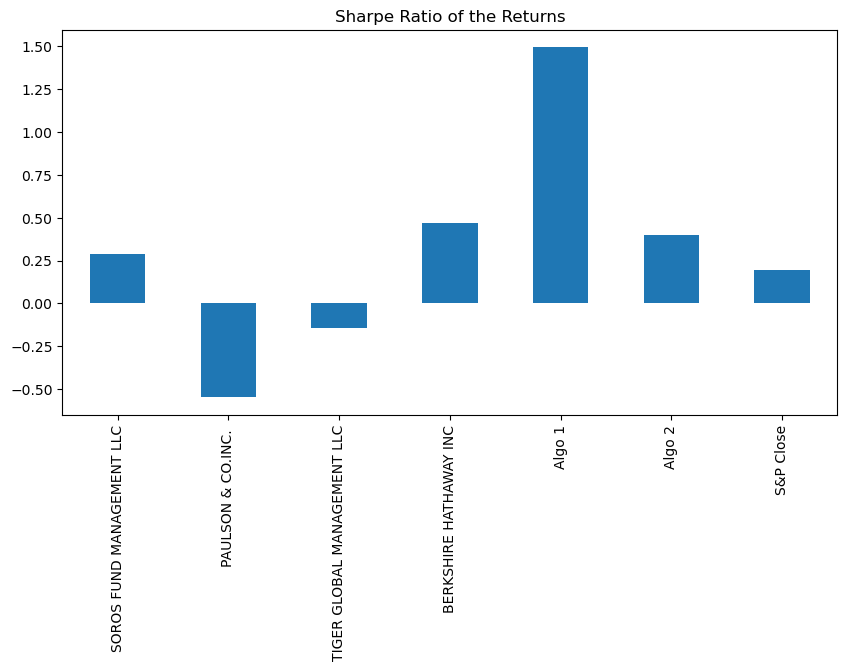

In [231]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratio of the Returns", figsize=(10, 5))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The Algo 1 strategy performed better than all of the other strategies. However, Algo 2 provided the investors with moderate returns. Nevertheless, when it comes to the average of the Algo sharpe ratios, it could be concluded that the algorithmic strategies in general perform better than the others.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [232]:
# Reading data from 1st stock
# Loading Mastercard data
ma_df = load_csv("./Resources/ma_historical.csv")
ma_df.head()

,Symbol,Close
Date,,
2018-01-02,MA,151.91
2018-01-03,MA,153.82
2018-01-04,MA,155.81
2018-01-05,MA,159.04
2018-01-08,MA,159.27


In [233]:
# Reading data from 2nd stock
# Loading Apple data
appl_df = load_csv("./Resources/appl_historical.csv")
appl_df.head()

,Symbol,Close
Date,,
2018-01-02,AAPL,43.07
2018-01-03,AAPL,43.06
2018-01-04,AAPL,43.26
2018-01-05,AAPL,43.75
2018-01-08,AAPL,43.59


In [234]:
# Reading data from 3rd stock
# Loading Tesla data
tsla_df = load_csv("./Resources/tsla_historical.csv")
tsla_df.head()

,Symbol,Close
Date,,
2018-01-02,TSLA,43.07
2018-01-03,TSLA,43.06
2018-01-04,TSLA,43.26
2018-01-05,TSLA,43.75
2018-01-08,TSLA,43.59


In [235]:
# Combine all stocks in a single DataFrame

# Plese note that the following approach has been commented because, in the following sections there are instructions to change the colum names after loaded it 
# before combining the data frames, it is required to rename the Colose colum name
# Otherwise, there could be multiple colums with the same name
#l_df.rename(columns={"Close":"L"}, inplace=True)
#otex_df.rename(columns={"Close":"Otex"}, inplace=True)
#shop_df.rename(columns={"Close":"Shop"}, inplace=True)

custom_con_df = pd.concat([ma_df, appl_df, tsla_df], axis="columns", join="inner")
custom_con_df.head()


,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,MA,151.91,AAPL,43.07,TSLA,43.07
2018-01-03,MA,153.82,AAPL,43.06,TSLA,43.06
2018-01-04,MA,155.81,AAPL,43.26,TSLA,43.26
2018-01-05,MA,159.04,AAPL,43.75,TSLA,43.75
2018-01-08,MA,159.27,AAPL,43.59,TSLA,43.59


In [236]:
# Reset Date index
# To reset date index, all dates will be replaced by index via the following function call
custom_con_df.reset_index(drop=True)
custom_con_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,MA,151.91,AAPL,43.07,TSLA,43.07
2018-01-03,MA,153.82,AAPL,43.06,TSLA,43.06
2018-01-04,MA,155.81,AAPL,43.26,TSLA,43.26
2018-01-05,MA,159.04,AAPL,43.75,TSLA,43.75
2018-01-08,MA,159.27,AAPL,43.59,TSLA,43.59


In [237]:
# Reorganize portfolio data by having a column per symbol
custom_con_df.drop(columns=["Symbol"], inplace=True)
custom_con_df.columns = ["MA", "AAPL", "TSLA"]
custom_con_df.head()

,MA,AAPL,AAPL
Date,,,
2018-01-02,151.91,43.07,43.07
2018-01-03,153.82,43.06,43.06
2018-01-04,155.81,43.26,43.26
2018-01-05,159.04,43.75,43.75
2018-01-08,159.27,43.59,43.59


In [238]:
# Calculate daily returns
custom_daily_returns_df = custom_con_df.pct_change()

# Drop NAs
custom_con_df.dropna()

# Display sample data
custom_daily_returns_df.head()


,MA,AAPL,AAPL
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.012573,-0.000232,-0.000232
2018-01-04,0.012937,0.004645,0.004645
2018-01-05,0.020730,0.011327,0.011327
2018-01-08,0.001446,-0.003657,-0.003657


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [239]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = custom_daily_returns_df.dot(weights)

# Display sample data
weighted_returns.head()


Date
2018-01-02         NaN
2018-01-03    0.004036
2018-01-04    0.007409
2018-01-05    0.014461
2018-01-08   -0.001956
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [240]:
# Join your returns DataFrame to the original returns DataFrame
# Assumption, the meaning of the "DataFrame that contains all of the portfolio" is the first combined data frame. 
con_df["Weight Returns"] = weighted_returns

In [241]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
con_df.dropna(inplace=True)

con_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close,Weight Returns
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.004036
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.007409
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.014461
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.001956
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.000328


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [242]:
# Calculate the annualized `std`
custom_annual_std = custom_daily_returns_df.std()*np.sqrt(252)
custom_annual_std

MA      0.251559
AAPL    0.275788
AAPL    0.275788
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

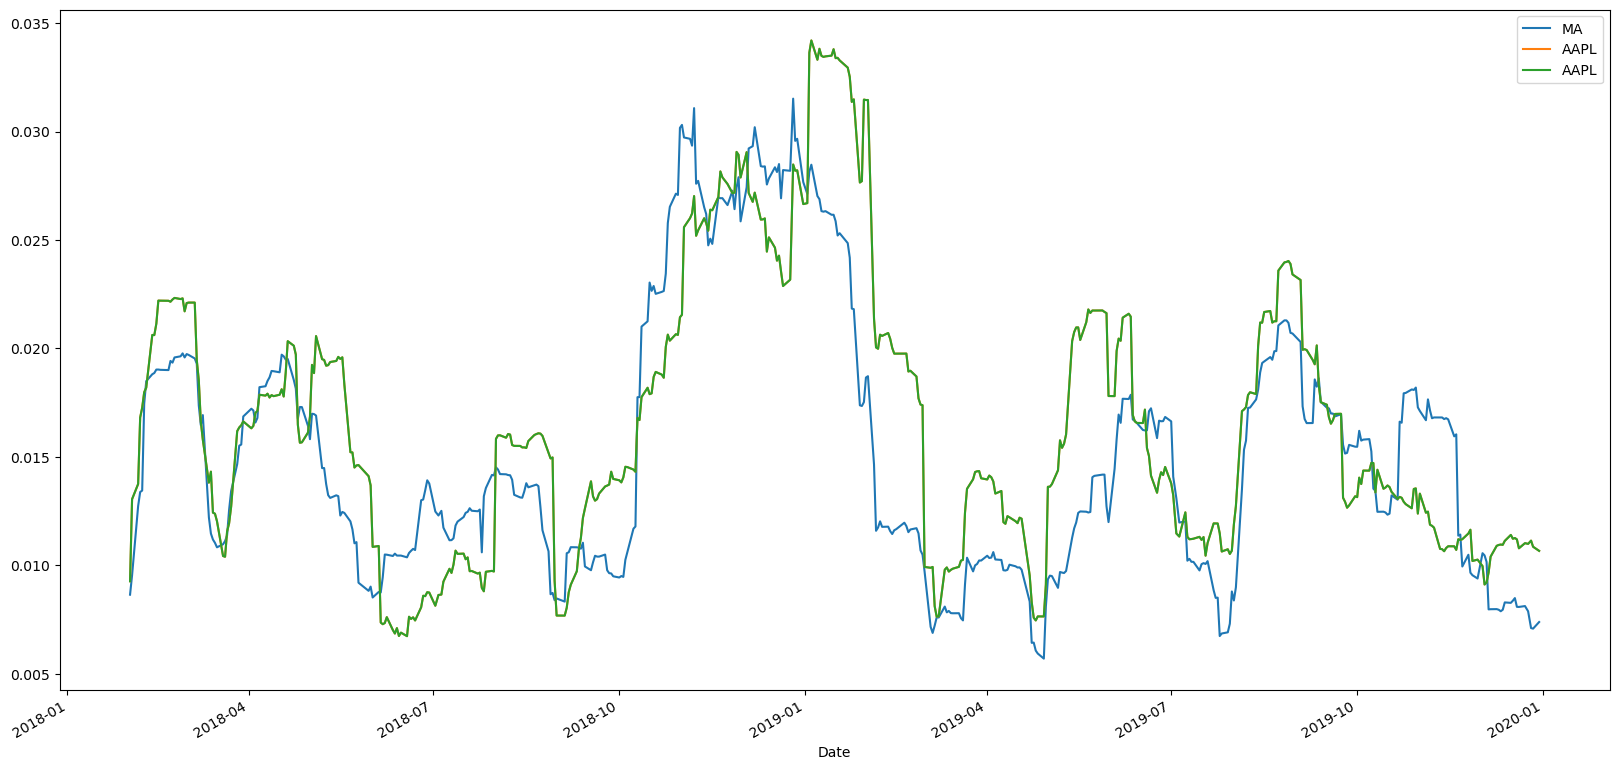

In [243]:
# Calculate rolling standard deviation
custom_rolling_std = custom_daily_returns_df.rolling(window=21).std()

# Plot rolling standard deviation
custom_rolling_std.plot(figsize=(20, 10))


### Calculate and plot the correlation

<AxesSubplot:>

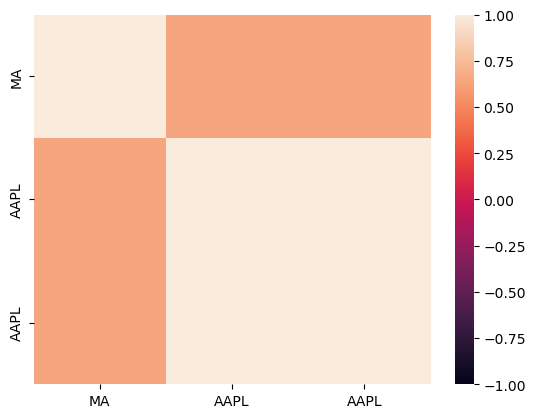

In [244]:
# Calculate and plot the correlation
custom_cor = custom_daily_returns_df.corr()
sns.heatmap(custom_cor, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

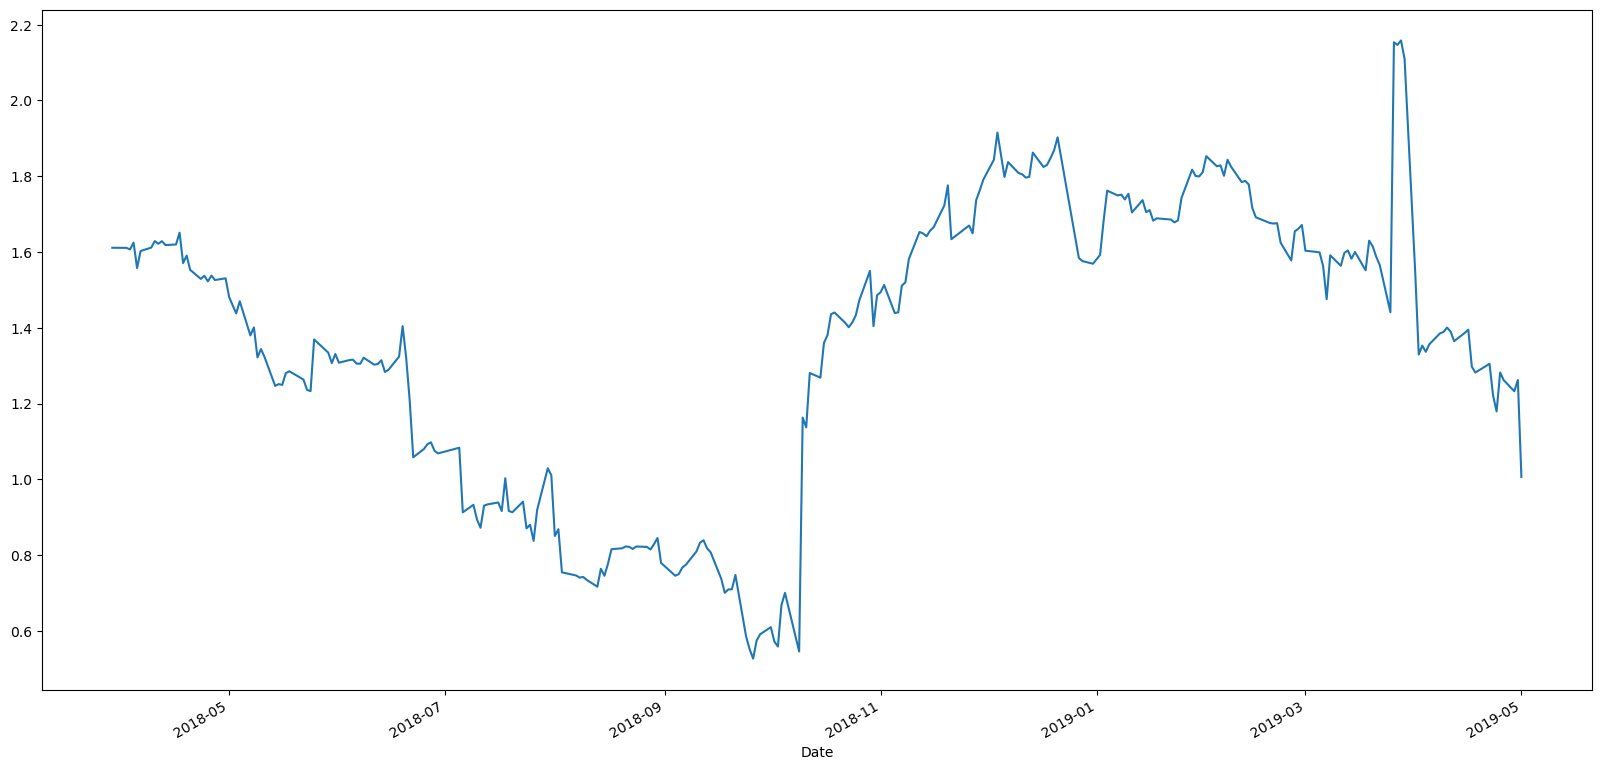

In [245]:
# Calculate and plot Beta
# Using the same function that has been implemented for the whale chart analysis earlier 
plot_beta_chart(con_df["Weight Returns"], con_df["S&P Close"], 60)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [246]:
# Calculate Annualized Sharpe Ratios
custom_annual_sharpe_ratio = (con_df.mean() * 252) / (con_df.std()* np.sqrt(252))

<AxesSubplot:>

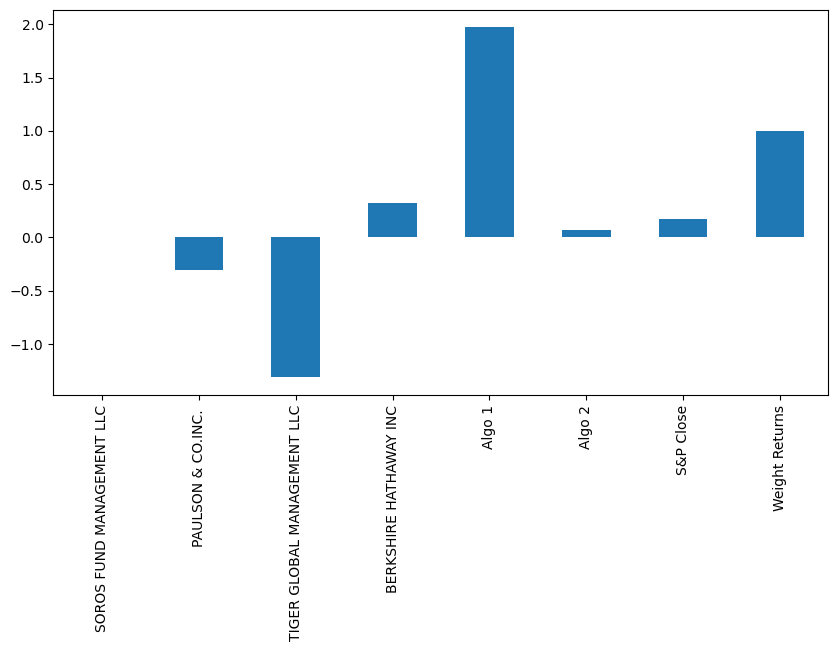

In [247]:
# Visualize the sharpe ratios as a bar plot
custom_annual_sharpe_ratio.plot(kind="bar", figsize=(10, 5))

### How does your portfolio do?

Write your answer here!

In [248]:
# According to analysis, the custom stock which is indicated by the “Weight Returns” performs just below the Algo 1. 
# However, since this is a combination of three stocks and the performance is almost similar to the Algo 1, 
# the custom stock could be considered to be the best option available. 
